### Firstly we will import libraries and get to know about the dataset on which we have to do analysis.

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
pd.set_option("max_columns",None)

In [3]:
my_data=pd.read_csv("/home/saumitra/Desktop/kaggle/API_ILO_country_YU.csv")
my_data.head(10)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999
6,Armenia,ARM,38.299999,38.700001,35.000000,32.500000,35.099998
7,Australia,AUS,11.400000,11.400000,11.700000,12.200000,13.100000
8,Austria,AUT,8.800000,8.200000,8.700000,9.100000,9.200000
9,Azerbaijan,AZE,14.600000,14.500000,14.300000,13.400000,13.600000


In [4]:
my_data.describe()

,2010,2011,2012,2013,2014
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,17.892957,17.902713,18.148142,18.100429,17.943539
std,10.540099,10.887558,11.430862,11.674366,11.554674
min,0.700000,0.700000,0.500000,0.700000,0.700000
25%,10.600000,10.410530,10.500000,10.490677,10.500000
50%,14.900000,14.523908,14.400000,14.100000,14.124300
75%,23.000000,23.200001,24.616293,23.435561,23.310668
max,57.200001,57.099998,61.700001,58.000000,57.900002


# unemployment projection on world map comparing two different years

## Figure-1

Different colorscale options are :

 ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [5]:
data=[dict(type='choropleth',autocolorscale=False,colorscale='Rainbow',showscale=True,
           locations=my_data['Country Name'],z=my_data['2010'],locationmode='country names',
          text=my_data['Country Code'],marker=dict(line=dict(color='rgba(240,240,240,1)',width=0.9)),
                                            colorbar=dict(tickprefix='  ',title='Unemployment Rate'))]

Different projection types available are:-

 ['equirectangular', 'mercator', 'orthographic', 'natural
            earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4',
            'azimuthal equal area', 'azimuthal equidistant', 'conic
            equal area', 'conic conformal', 'conic equidistant',
            'gnomonic', 'stereographic', 'mollweide', 'hammer',
            'transverse mercator', 'albers usa', 'winkel tripel',
            'aitoff', 'sinusoidal']

In [6]:
layout=dict(title='World Unemployment in 2014',
            geo=dict(showframe=True,showocean=True,oceancolor='rgba(0, 204, 201, 1)',
                     projection=dict(type='orthographic',rotation=dict(lon=78,lat=20)),
                    lonaxis=dict(showgrid=True,gridcolor='rgba(100,100,100,1)'),
                    lataxis=dict(showgrid=True,gridcolor='rgba(100,100,100,1)')))
fig=dict(data=data,layout=layout)

In [7]:
iplot(data)
iplot(fig)

## Figure-2

In [8]:
frame=go.Choropleth(autocolorscale=False,colorscale='Rainbow',z=my_data['2014'],
                    locations=my_data['Country Name'],showscale=True,locationmode='country names',
                    text=my_data['Country Code'],colorbar=dict(tickprefix='  ',title='Unemployment Rate'),
                    marker=dict(line=dict(color='rgba(240,240,240,1)',width=0.9)))

In [9]:
layout=dict(title='World Unemployment in 2014',geo=dict(showframe=True,showocean=True,oceancolor='rgba(0,204,201,1)',
           projection=dict(rotation=dict(lat=10,lon=10),type='orthographic'),
           lataxis=dict(showgrid=True,gridcolor='rgba(0,0,0,1)'),
           lonaxis=dict(showgrid=True,gridcolor='rgba(0,0,0,1)')))
fig=dict(data=[frame],layout=layout)
iplot(fig)

# comparing two years using Bubble scatter plot-4 dimensional plot

## Figure-1

In [10]:
frame1=go.Scatter(y=my_data['2010'],text=my_data['Country Name']+'('+my_data['Country Code']+')',mode='markers',
                  marker=dict(size=my_data['2010'],colorscale='Rainbow',showscale=True,color=my_data['2010']))
layout=dict(title='Unemployment in 2010',yaxis=dict(title='count',zeroline=False),xaxis=dict(zeroline=False,ticklen=0.5))
fig=dict(data=[frame1],layout=layout)
iplot(fig)

# Figure-2

In [11]:
frame1=go.Scatter(y=my_data['2014'],text=my_data['Country Name']+'('+my_data['Country Code']+')',mode='markers',
                  marker=dict(size=my_data['2014'],colorscale='Rainbow',showscale=True,color=my_data['2014']))
layout=dict(title='Unemployment in 2014',yaxis=dict(title='count',zeroline=False),xaxis=dict(zeroline=False,ticklen=0.5))
fig=dict(data=[frame1],layout=layout)
iplot(fig)

# Heatmap
comparing change in unemployment between different 15 top and below countries from 2010 to 2014

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
diff=my_data['2014'] - my_data['2010']
a,b=(list(x) for x in zip(*sorted(zip(diff,my_data['Country Name']),reverse=True)))

In [14]:
C=np.concatenate([a[:15],a[-16:-1]])
D=np.concatenate([b[:15],b[-16:-1]])
keys=[c for c in my_data if c.startswith('20')]
new_data=pd.melt(my_data,id_vars='Country Name',value_vars=keys,value_name='key')
new_data['Year']=new_data['variable']
hade=new_data['Country Name'].isin(D)
final_data=new_data[hade]

for pd.melt function visit --https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

for pivot function visit --https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

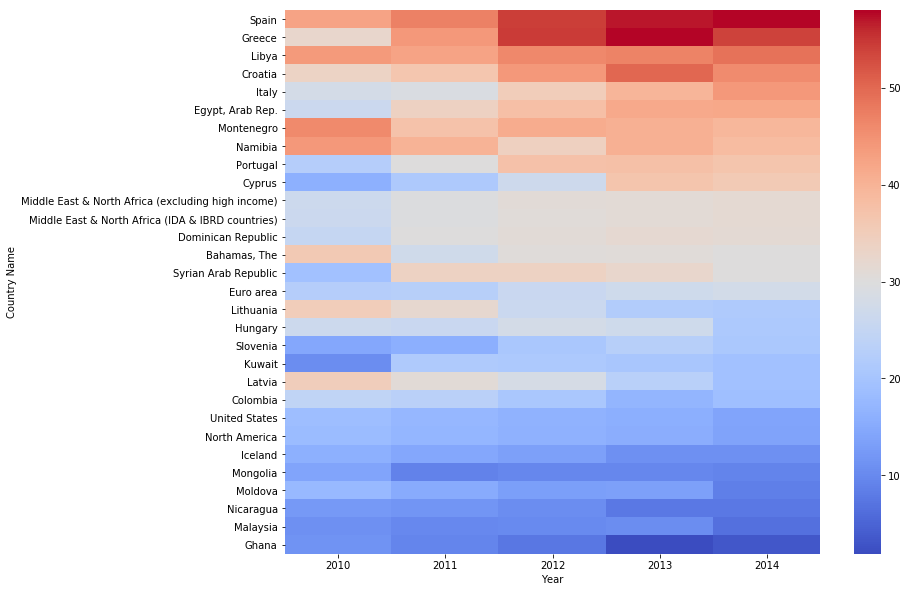

In [15]:
plt.figure(figsize=(12,10))
country_pivot=final_data.pivot('Country Name','Year','key')
country_pivot=country_pivot.sort_values('2014',ascending=False)
ax=sns.heatmap(country_pivot,annot=False,linewidths=0,linecolor='white',cmap='coolwarm')

**Types of cmap**  

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


# Barplot comparison

## Figure-1
comparing change in unemployment between different 15 top and below countries from 2010 to 2014

[Text(0.5, 0, 'Decrease in Youth Unemployment Rates'),
 Text(0.5, 1.0, 'Net Youth Unemployment Rates')]

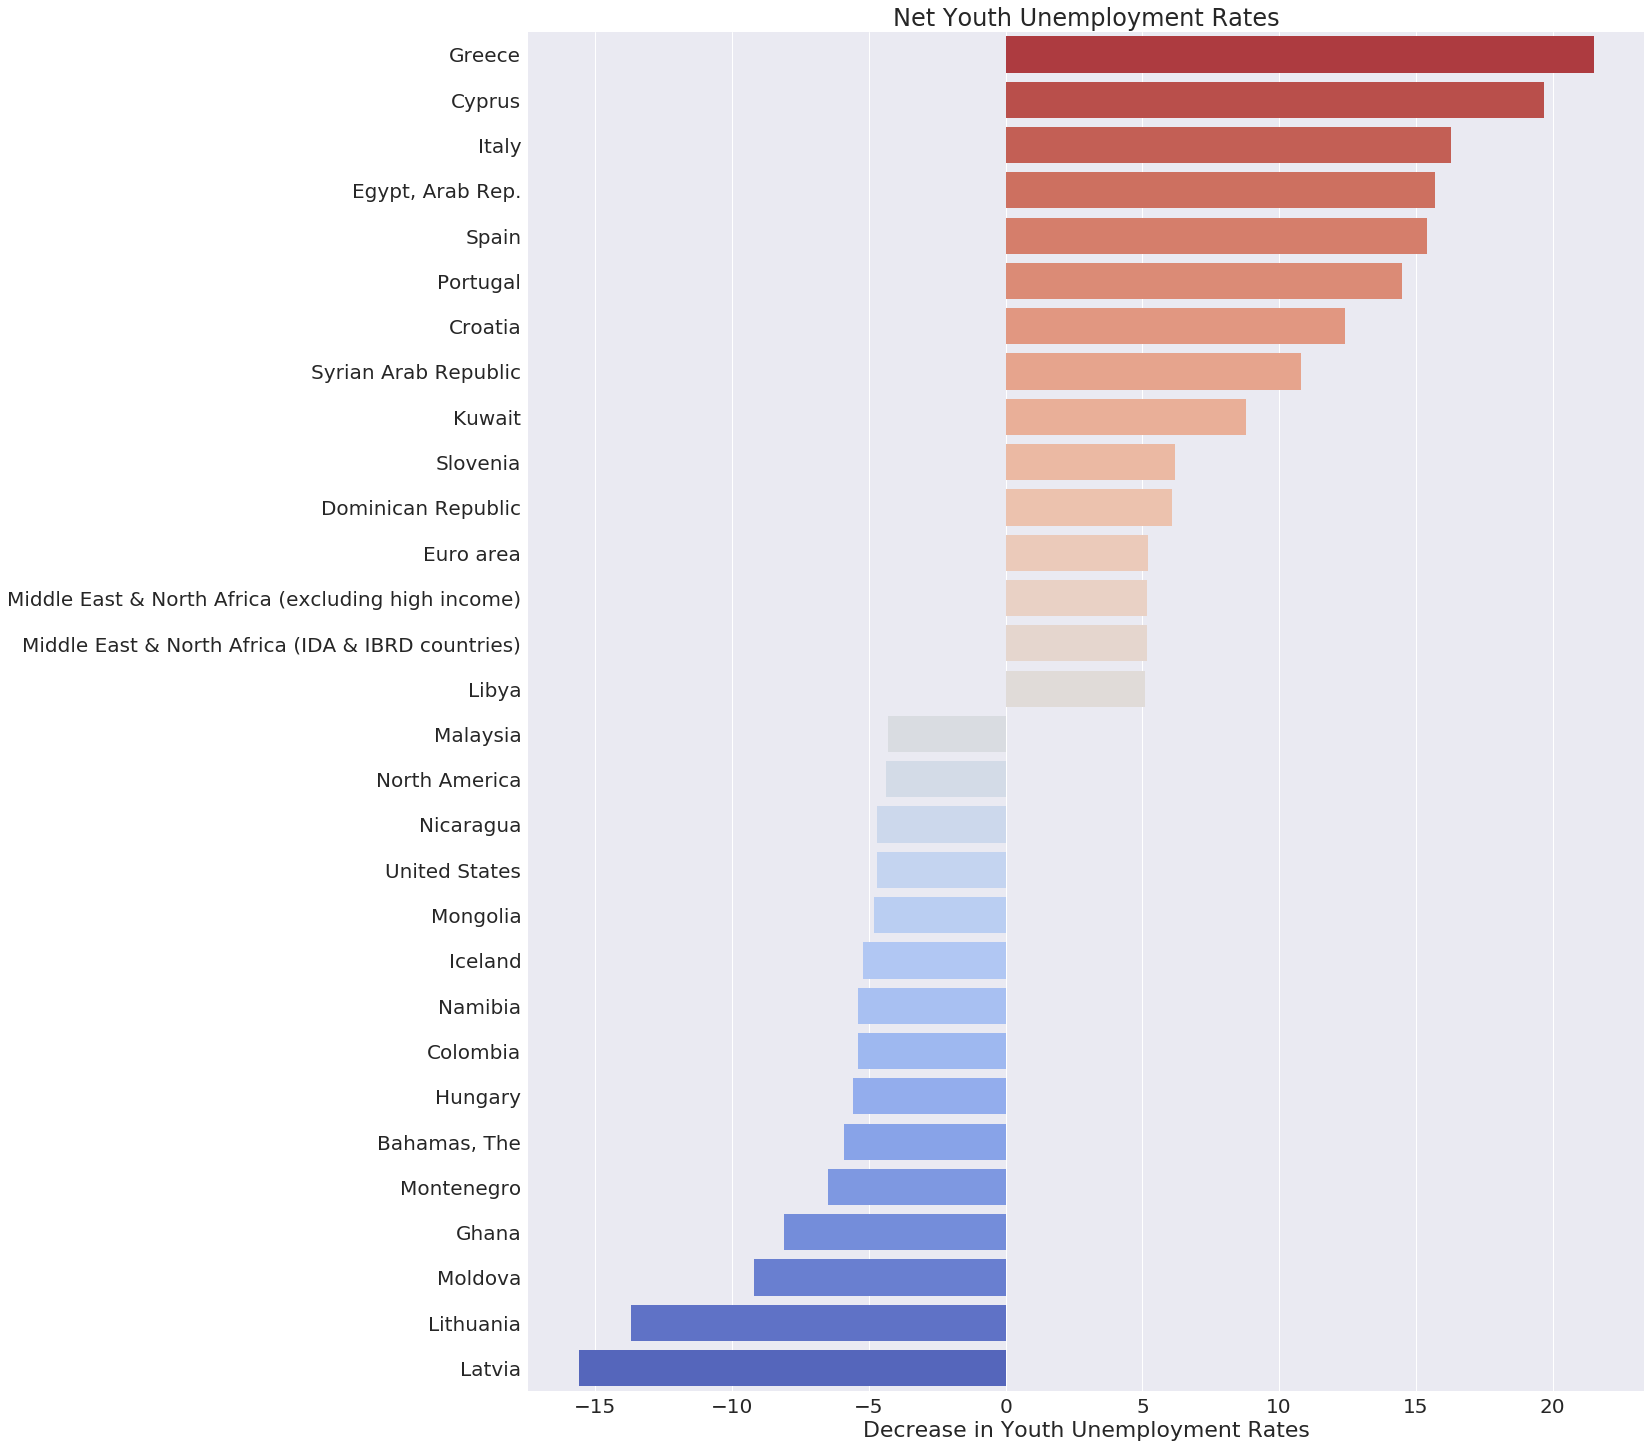

In [16]:
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(20,25))
cw=sns.color_palette('coolwarm',len(C))
sns.barplot(C,D,palette=cw[::-1])
ax.set(xlabel='Decrease in Youth Unemployment Rates',title='Net Youth Unemployment Rates')

## Figure-2
comparing change in unemployment between different countries from 2010 to 2014

[Text(0.5, 0, 'Change in Youth Unemployment Rates'),
 Text(0.5, 1.0, 'Net Youth Unemployment Rates')]

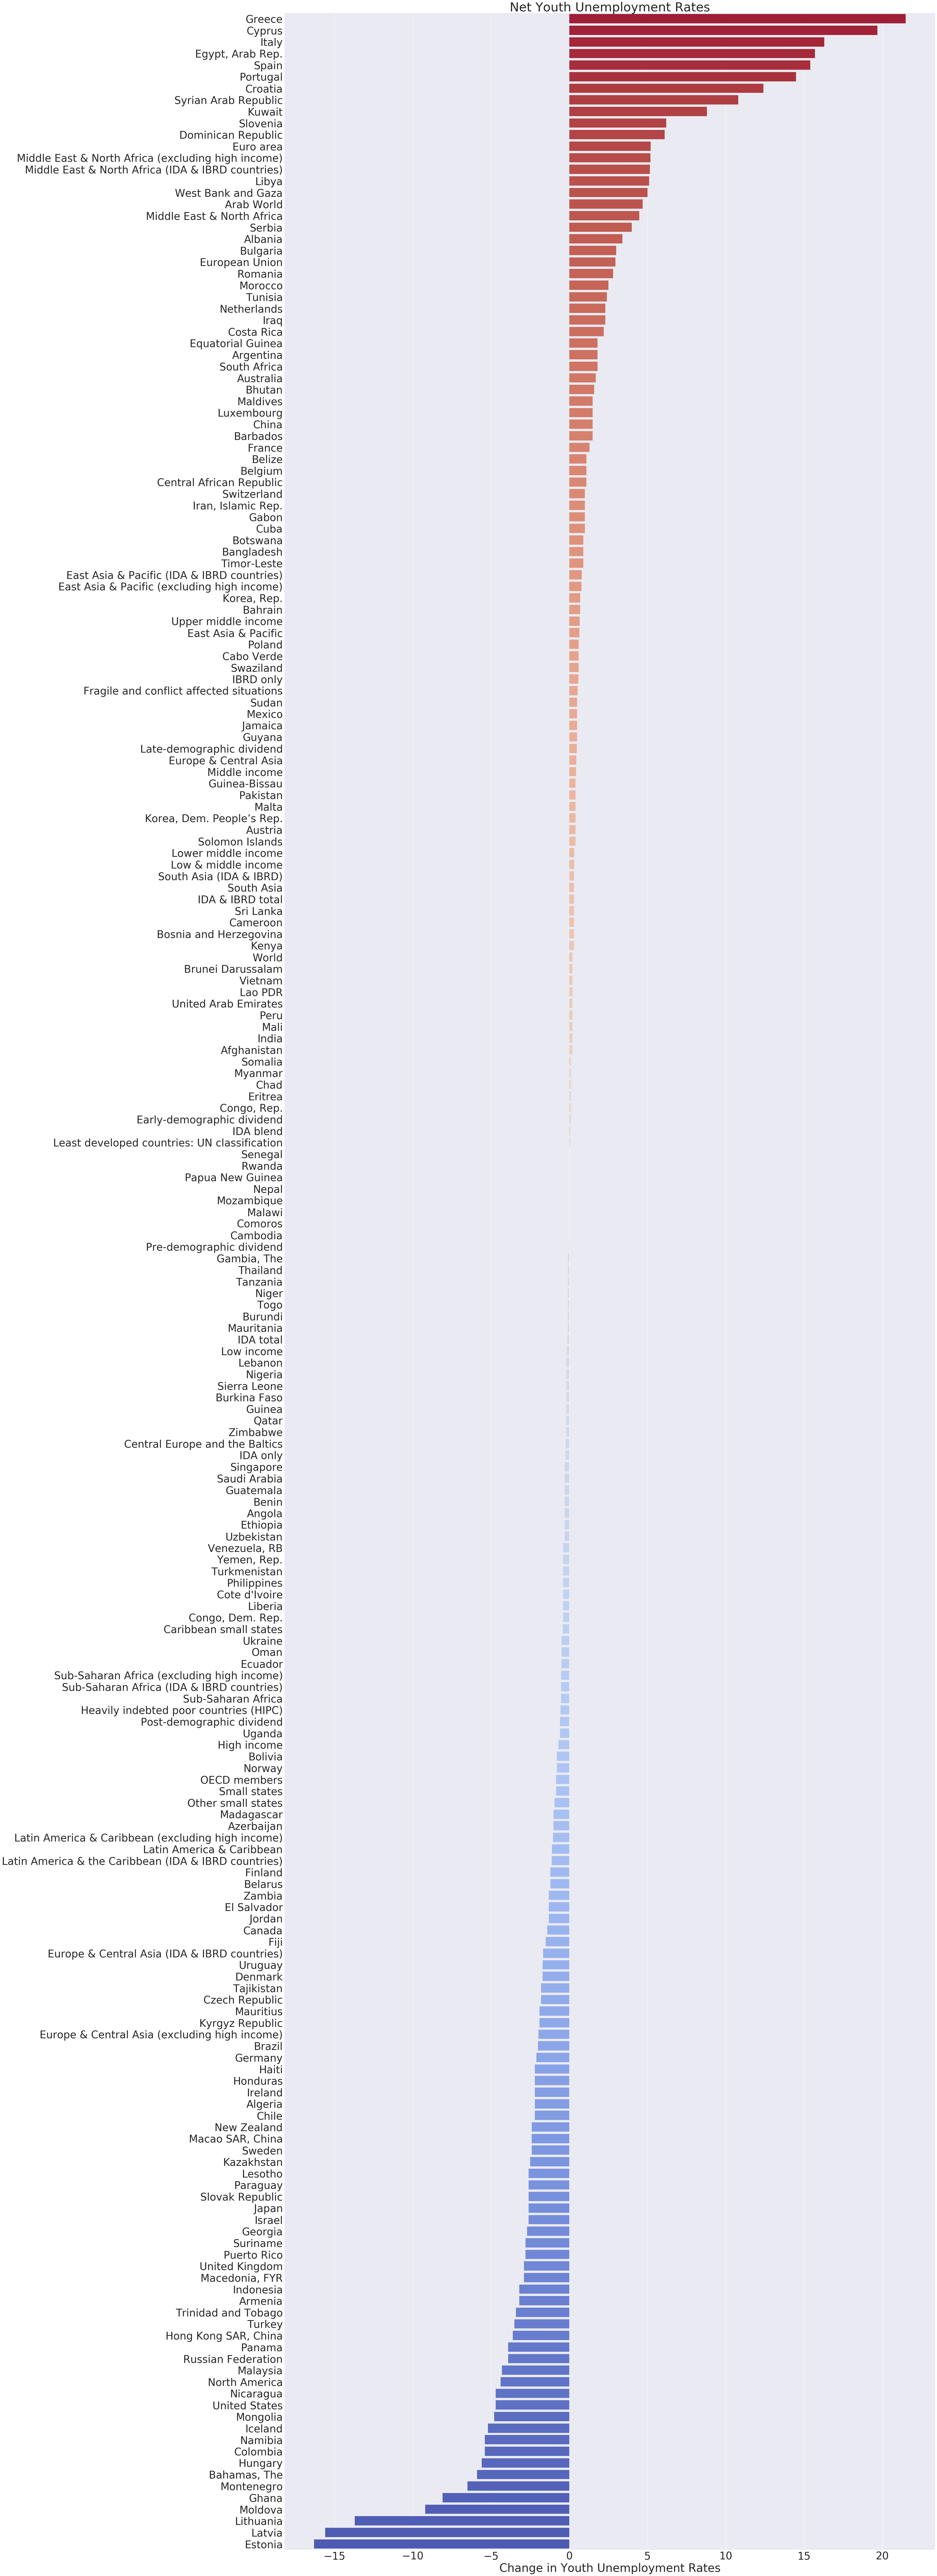

In [17]:
sns.set(font_scale=4)
f,ax=plt.subplots(figsize=(45,180))
colouring=sns.color_palette('coolwarm',len(a))
sns.barplot(a,b,palette=colouring[::-1])
ax.set(xlabel='Change in Youth Unemployment Rates',title='Net Youth Unemployment Rates')